In [1]:
import numpy
import pandas as pd
import numpy as np
import networkx as nx
from math import ceil
import matplotlib.pyplot as plt

In [118]:
match = 2

In [2]:
def get_time_points(match_num):
    fullevent_data = pd.read_csv("./2020_Problem_D_DATA/fullevents.csv")
    pfed = fullevent_data.loc[:, ['MatchID', 'TeamID', 'MatchPeriod', 'EventTime', 'EventType', 'EventSubType']]
    pfed = pfed[pfed['MatchID']==match_num]
    pfed = pfed.reset_index()
    pfed = pfed.loc[:, ['MatchID', 'TeamID', 'MatchPeriod', 'EventTime', 'EventType', 'EventSubType']]
    last_1H = max(pfed[pfed['MatchPeriod']=='1H'].EventTime)

    fed_2H = pfed[pfed['MatchPeriod']=='2H']
    fed_2H['EventTime'] += last_1H

    pfed = pd.concat([pfed[pfed['MatchPeriod']=='1H'], fed_2H])

    points = [0]

    points.append(min(pfed[pfed['MatchPeriod']=='2H'].index))

    sindex = list(pfed[pfed['EventType']=='Substitution'].index)

    for p in sindex:
        points.append(p)

    points.append(max(pfed.index))

    points = list(set(points))
    points = sorted(points)

    time_points = []

    for i in range(len(points)-1):
        start_time = pfed.iloc[points[i]].EventTime
        end_time = pfed.iloc[points[i+1]].EventTime
        print(start_time, end_time)
        # time_points.append(start_time)

        duration = end_time - start_time
        num_points = ceil(duration / 360)
        if num_points <= 0:
            continue
        sub_quantum = duration / num_points

        while start_time < end_time:
            time_points.append(start_time)
            start_time += sub_quantum

    time_points.append(pfed.iloc[points[-1]].EventTime)

    return time_points

# Find Time Points

In [119]:
fullevent_data = pd.read_csv("./2020_Problem_D_DATA/fullevents.csv")

In [120]:
pfed = fullevent_data.loc[:, ['MatchID', 'TeamID', 'MatchPeriod', 'EventTime', 'EventType', 'EventSubType']]
pfed = pfed[pfed['MatchID']==match]

In [121]:
pfed = pfed.reset_index()
pfed = pfed.loc[:, ['MatchID', 'TeamID', 'MatchPeriod', 'EventTime', 'EventType', 'EventSubType']]

In [122]:
last_1H = max(pfed[pfed['MatchPeriod']=='1H'].EventTime)

fed_2H = pfed[pfed['MatchPeriod']=='2H']
fed_2H['EventTime'] += last_1H

pfed = pd.concat([pfed[pfed['MatchPeriod']=='1H'], fed_2H])

In [123]:
points = [0]

points.append(min(pfed[pfed['MatchPeriod']=='2H'].index))

sindex = list(pfed[pfed['EventType']=='Substitution'].index)

for p in sindex:
    points.append(p)

points.append(max(pfed.index))

points = list(set(points))
points = sorted(points)

points

[0, 707, 723, 952, 953, 1011, 1083, 1381, 1471]

In [124]:
time_points = []

for i in range(len(points)-1):
    start_time = pfed.iloc[points[i]].EventTime
    end_time = pfed.iloc[points[i+1]].EventTime
    print(start_time, end_time)
    # time_points.append(start_time)

    duration = end_time - start_time
    num_points = ceil(duration / 360)
    if num_points <= 0:
        continue
    sub_quantum = duration / num_points

    while start_time < end_time:
        time_points.append(start_time)
        start_time += sub_quantum

time_points.append(pfed.iloc[points[-1]].EventTime)

1.6955560000000034 2823.881264
2823.881264 2883.395098
2883.395098 3783.395098
3783.395098 3783.395098
3783.395098 4023.395098
4023.395098 4263.395098
4263.395098 5523.395098
5523.395098 5776.533404


In [125]:
for i in range(len(time_points)-1):
    print(time_points[i+1]-time_points[i])

352.7732135
352.7732135
352.7732135
352.7732135000001
352.7732135000001
352.7732135000001
352.7732135000001
352.77321349999966
59.51383399999986
300.0
300.0
300.0
240.0
240.0
315.0
315.0
315.0
315.0
253.13830599999983


# Handle Passing

In [3]:
def get_raw_data_filtered(match_num, is_oppnent):
    if is_oppnent:
        player_list = list(set(fullevent_data.TeamID) - {'Huskies'})
    else:
        player_list = ['Huskies']
    
    passing_data = pd.read_csv("./2020_Problem_D_DATA/passingevents.csv")
    PPD = passing_data.loc[:, ['MatchID', 'TeamID', 'OriginPlayerID', 'DestinationPlayerID', 'EventTime', 'EventOrigin_x', 'EventOrigin_y', 'EventDestination_x', 'EventDestination_y']]
    PPD = PPD[PPD['MatchID']==match_num][PPD['TeamID'].isin(player_list)]

    return PPD

In [4]:
passing_data = pd.read_csv("./2020_Problem_D_DATA/passingevents.csv")

In [127]:
passing_data.head()

,MatchID,TeamID,OriginPlayerID,DestinationPlayerID,MatchPeriod,EventTime,EventSubType,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
0,1,Huskies,Huskies_D1,Huskies_F1,1H,46.323501,Head pass,34,97,59.0,95.0
1,1,Huskies,Huskies_M1,Huskies_F2,1H,51.022546,Simple pass,53,89,69.0,91.0
2,1,Opponent1,Opponent1_D2,Opponent1_G1,1H,89.008721,Simple pass,19,16,5.0,50.0
3,1,Opponent1,Opponent1_G1,Opponent1_F1,1H,92.216160,Launch,5,50,67.0,44.0
4,1,Huskies,Huskies_M2,Huskies_M3,1H,98.265191,Simple pass,42,55,36.0,54.0


In [128]:
PPD = passing_data.loc[:, ['MatchID', 'TeamID', 'OriginPlayerID', 'DestinationPlayerID', 'EventTime', 'EventOrigin_x', 'EventOrigin_y', 'EventDestination_x', 'EventDestination_y']]
PPD = PPD[PPD['MatchID']==match][PPD['TeamID'].isin(list(set(fullevent_data.TeamID) & {'Huskies'}))]

In [129]:
PPD

,MatchID,TeamID,OriginPlayerID,DestinationPlayerID,EventTime,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
570,2,Huskies,Huskies_F2,Huskies_D4,43.463685,43,26,41.0,8.0
576,2,Huskies,Huskies_G1,Huskies_D1,96.644054,12,53,28.0,99.0
583,2,Huskies,Huskies_M1,Huskies_D6,173.929738,38,87,27.0,93.0
584,2,Huskies,Huskies_D6,Huskies_F1,176.436821,27,93,83.0,79.0
595,2,Huskies,Huskies_F2,Huskies_D4,249.373849,41,11,36.0,5.0
...,...,...,...,...,...,...,...,...,...
1115,2,Huskies,Huskies_M2,Huskies_G1,2435.044328,21,74,9.0,65.0
1121,2,Huskies,Huskies_D1,Huskies_D6,2525.586862,39,78,59.0,95.0
1139,2,Huskies,Huskies_M2,Huskies_F1,2788.677561,32,32,53.0,54.0
1140,2,Huskies,Huskies_F1,Huskies_M7,2794.363040,68,50,72.0,57.0


# Centroid coordinates

In [55]:
ccs = []

for i in range(len(time_points)-1):
    start_time = time_points[i]
    end_time = time_points[i+1]
    if i == len(time_points)-2:
        end_time += 360

    ppd = PPD[PPD.EventTime >= start_time][PPD.EventTime < end_time]
    
    X_mean, Y_mean = ppd[['EventOrigin_x', 'EventOrigin_y']].mean()
    # pomd = ppd.groupby('OriginPlayerID').mean()
    # pomd['distance'] = [((x - X_mean)**2 + (y - Y_mean)**2)**0.5 for x,y in zip(pomd['EventOrigin_x'],pomd['EventOrigin_y'])]

    ccs.append((X_mean, Y_mean))

centroid_coordinates_and_dispersion = pd.DataFrame({'Centroid coordinates':ccs})

centroid_coordinates_and_dispersion.to_csv("./results/short/match_{}/centroid_coordinates_and_dispersion.csv".format(match))

# Clustering coefficient

In [56]:
for i in range(len(time_points)-1):
    start_time = time_points[i]
    end_time = time_points[i+1]
    if i == len(time_points)-2:
        end_time += 360

    ppd = PPD[PPD.EventTime >= start_time][PPD.EventTime < end_time]
    
    ppd['count'] = 1
    ppd = ppd.groupby(['OriginPlayerID', 'DestinationPlayerID']).sum()
    ppd = ppd.sort_values(by='count').ix[::-1]

    temple_ppd = ppd.copy()
    if len(temple_ppd)==0:
        continue
    max_count = max(temple_ppd['count'])
    temple_ppd['count'] = temple_ppd['count'] / max_count
    
    d0 = temple_ppd.copy()
    d0 = pd.DataFrame({'i': list(map(lambda x: x[0], d0.index)), 'j': list(map(lambda x: x[1], d0.index)), 'count':d0.to_numpy().T[0]})
    d1 = d0.copy()
    d2 = d0.copy()

    d1 = d1.rename(columns={'i':'j', "j":'k'})
    d2 = d2.rename(columns={'i':'k', "j":'i'})

    merged_data = pd.merge(pd.merge(d0, d1, on='j'), d2, on=['k', 'i'])
    md = merged_data

    md = md.rename(columns={'count_x':'wij', 'count_y':'wjk', 'count':'wki'})

    md['www'] = [(wij * wjk * wki) for wij, wjk, wki in zip(md['wij'], md['wjk'], md['wki'])]
    md['ww'] = [(wij * wki) for wij, wki in zip(md['wij'], md['wki'])]

    md = md.groupby('i').sum()

    md['Clustering coefficient'] = [www/ww for www,ww in zip(md['www'], md['ww'])]
    md = md.sort_values(by='Clustering coefficient').ix[::-1]

    md.to_csv('./results/short/match_{}/{}-Clustering coefficient.csv'.format(match, i))

# Eigenvector centrality dispersion

In [57]:
dispersions = []

for i in range(len(time_points)-1):
    start_time = time_points[i]
    end_time = time_points[i+1]
    if i == len(time_points)-2:
        end_time += 360

    ppd = PPD[PPD.EventTime >= start_time][PPD.EventTime < end_time]

    ppd = ppd.rename(columns={'OriginPlayerID':'i', 'DestinationPlayerID':'j'})
    
    players = list(set(ppd['i']))
    players = sorted(players)

    mat = np.zeros((30, 30))

    for i, iplayer in enumerate(players):
        for j, jplayer in enumerate(players):
            qr = ppd[ppd['i']==iplayer][ppd['j']==jplayer].to_numpy()
            if len(qr) > 0:
                mat[i][j] = qr[-1][-1]
            else:
                mat[i][j] = 0
    
    A = mat

    G = nx.Graph()

    for i, p in enumerate(players):
        G.add_node(i)

    for i in range(len(players)):
        for j in range(len(players)):
            G.add_edge(i, j, weight=A[i][j])

    try:
        ec = nx.eigenvector_centrality_numpy(G, weight='weight')
    except:
        continue

    ps = []
    vs = []
    for p, v in ec.items():
        ps.append(p)
        vs.append(v)

    max_ec = max(vs)
    player_with_ec = ps[vs.index(max_ec)]

    dispersion_ec = np.std(vs)

    dispersions.append(dispersion_ec)

pd.DataFrame({'dispersion':dispersions}).to_csv('./results/short/match_{}/Eigenvector centrality dispersion.csv'.format(match))

# 传球距离变换数

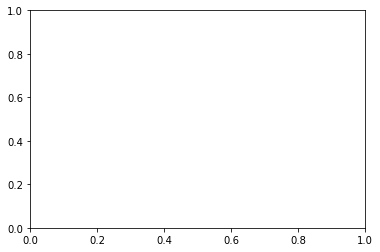

In [130]:
DIST_THRESHOLD = 20

nums_dist_shift = []

for i in range(len(time_points)-1):
    start_time = time_points[i]
    end_time = time_points[i+1]
    if i == len(time_points)-2:
        end_time += 360

    ppd = PPD[PPD.EventTime >= start_time][PPD.EventTime < end_time]
    
    dists = [((xt-x0)**2+(yt-y0)**2)**0.5 >= 20 for x0,y0,xt,yt in zip(ppd.EventOrigin_x,ppd.EventOrigin_y,ppd.EventDestination_x,ppd.EventDestination_y)]

    count = 1
    for i in range(len(dists)-1):
        if dists[i] != dists[i+1]:
            count += 1

    nums_dist_shift.append(count)

ndsd = pd.DataFrame({'nums_dist_shift':nums_dist_shift})

ndsd.to_csv("./results/task3/{}-nums_dist_shift.csv".format(match))

plt.plot(nums_dist_shift, color='b', linewidth=3, label='距离变化数')
plt.savefig('./results/task3/{}{}'.format(match, '.png'))
plt.cla()

In [22]:
nums_dist_shift

[23, 36, 14, 37, 20, 12, 14, 9, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [135]:
match_num = 1
is_opponent = False

tps = get_time_points(match_num)
ppd = get_raw_data_filtered(match_num, is_opponent)



31.174680999999996 2811.836637
2811.836637 2870.221212
2870.221212 3710.221212
3710.221212 4430.221212
4430.221212 4430.221212
4430.221212 4730.221212
4730.221212 5757.107459000001


# 传球数超过3

In [144]:
nums_pass_beyond_3 = []
nums_pass_beyond_3_opponent = []

for i in range(1, 39):
    for is_opponent in [False, True]:
        ppd = get_raw_data_filtered(i, is_opponent)
        pairs = [(i, j) for i,j in zip(ppd.OriginPlayerID, ppd.DestinationPlayerID)]

        total = 0
        count = 0
        for j in range(1, len(pairs)):
            if pairs[j][0] == pairs[j-1][1]:
                count += 1
            else:
                if count >= 2:
                    total += 1
                count = 0
        if not is_opponent:
            nums_pass_beyond_3.append(total)
        else:
            nums_pass_beyond_3_opponent.append(total)

pd.DataFrame({'MatchID':[i for i in range(1,39)], 'nums_pass_beyond_3':nums_pass_beyond_3, 'nums_pass_beyond_3_opponent':nums_pass_beyond_3_opponent}).to_csv('./results/task3/nums_pass_beyond_3.csv')

In [ ]:
ccs = []

for i in range(len(time_points)-1):
    start_time = time_points[i]
    end_time = time_points[i+1]
    if i == len(time_points)-2:
        end_time += 360

    ppd = PPD[PPD.EventTime >= start_time][PPD.EventTime < end_time]
    
    X_mean, Y_mean = ppd[['EventOrigin_x', 'EventOrigin_y']].mean()
    # pomd = ppd.groupby('OriginPlayerID').mean()
    # pomd['distance'] = [((x - X_mean)**2 + (y - Y_mean)**2)**0.5 for x,y in zip(pomd['EventOrigin_x'],pomd['EventOrigin_y'])]

    ccs.append((X_mean, Y_mean))

centroid_coordinates_and_dispersion = pd.DataFrame({'Centroid coordinates':ccs})

centroid_coordinates_and_dispersion.to_csv("./results/short/match_{}/centroid_coordinates_and_dispersion.csv".format(match))

In [136]:
ppd

,MatchID,TeamID,OriginPlayerID,DestinationPlayerID,EventTime,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
0,1,Huskies,Huskies_D1,Huskies_F1,46.323501,34,97,59.0,95.0
1,1,Huskies,Huskies_M1,Huskies_F2,51.022546,53,89,69.0,91.0
4,1,Huskies,Huskies_M2,Huskies_M3,98.265191,42,55,36.0,54.0
8,1,Huskies,Huskies_D1,Huskies_F1,130.656530,34,91,52.0,97.0
11,1,Huskies,Huskies_D1,Huskies_G1,161.221470,14,65,11.0,50.0
...,...,...,...,...,...,...,...,...,...
559,1,Huskies,Huskies_M5,Huskies_F2,2782.117478,38,34,47.0,86.0
561,1,Huskies,Huskies_F2,Huskies_M5,2825.780227,74,61,98.0,72.0
562,1,Huskies,Huskies_M5,Huskies_F2,2836.145109,88,93,79.0,91.0
563,1,Huskies,Huskies_F2,Huskies_M1,2841.121956,79,91,84.0,86.0


In [ ]:


for match_num in range(1, 39):
    ppd = get_raw_data_filtered(i, False)
    time_points = get_time_points(match_num)

In [145]:
import seaborn as sns

In [162]:
sns.set()

In [169]:
t = [i - 1 for i in nums_dist_shift]

In [170]:
temple_data = pd.DataFrame({'x':[i for i in range(len(nums_dist_shift))], 'y':nums_dist_shift, 'Y':t})

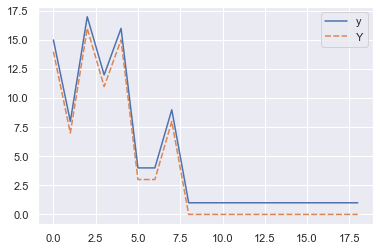

In [171]:
p = sns.lineplot(data=temple_data,  ci=95)
f = p.get_figure()
f.savefig('test.png')

In [172]:
help(sns.lineplot)

Help on function lineplot in module seaborn.relational:

lineplot(x=None, y=None, hue=None, size=None, style=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, units=None, estimator='mean', ci=95, n_boot=1000, seed=None, sort=True, err_style='band', err_kws=None, legend='brief', ax=None, **kwargs)
    Draw a line plot with possibility of several semantic groupings.
    
    The relationship between ``x`` and ``y`` can be shown for different subsets
    of the data using the ``hue``, ``size``, and ``style`` parameters. These
    parameters control what visual semantics are used to identify the different
    subsets. It is possible to show up to three dimensions independently by
    using all three semantic types, but this style of plot can be hard to
    interpret and is often ineffective. Using redundant semantics (i.e. both
    ``hue`` and ``style`` for the same variable) can be helpfu

In [173]:
dir(sns)

['FacetGrid',
 'JointGrid',
 'PairGrid',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_orig_rc_params',
 'algorithms',
 'axes_style',
 'axisgrid',
 'barplot',
 'blend_palette',
 'boxenplot',
 'boxplot',
 'categorical',
 'catplot',
 'choose_colorbrewer_palette',
 'choose_cubehelix_palette',
 'choose_dark_palette',
 'choose_diverging_palette',
 'choose_light_palette',
 'clustermap',
 'cm',
 'color_palette',
 'colors',
 'countplot',
 'crayon_palette',
 'crayons',
 'cubehelix_palette',
 'dark_palette',
 'desaturate',
 'despine',
 'distplot',
 'distributions',
 'diverging_palette',
 'dogplot',
 'external',
 'factorplot',
 'get_dataset_names',
 'heatmap',
 'hls_palette',
 'husl_palette',
 'jointplot',
 'kdeplot',
 'light_palette',
 'lineplot',
 'lmplot',
 'load_dataset',
 'lvplot',
 'matrix',
 'miscplot',
 'mpl',
 'mpl_palette',
 'pairplot',
 'palettes',
 'palplot',
 'plotting_context',
 'poin